In [303]:
import pandas as pd
df=pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [304]:
df_new=df.drop(['guestroom','stories','area','prefarea','mainroad'],axis='columns')
df_new

,price,bedrooms,bathrooms,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,4,2,no,no,yes,2,furnished
1,12250000,4,4,no,no,yes,3,furnished
2,12250000,3,2,yes,no,no,2,semi-furnished
3,12215000,4,2,yes,no,yes,3,furnished
4,11410000,4,1,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...
540,1820000,2,1,yes,no,no,2,unfurnished
541,1767150,3,1,no,no,no,0,semi-furnished
542,1750000,2,1,no,no,no,0,unfurnished
543,1750000,3,1,no,no,no,0,furnished


In [305]:
df_new.isnull().sum()

price               0
bedrooms            0
bathrooms           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [306]:
from sklearn.preprocessing import LabelEncoder
lab_FS=LabelEncoder()
df_new['furnishingstatus']=lab_FS.fit_transform(df['furnishingstatus'])

lab_Base=LabelEncoder()
df_new['basement']=lab_Base.fit_transform(df['basement'])

lab_Ac=LabelEncoder()
df_new['airconditioning']=lab_Ac.fit_transform(df['airconditioning'])

lab_Water=LabelEncoder()
df_new['hotwaterheating']=lab_Water.fit_transform(df['hotwaterheating'])


In [307]:
df_new.isnull().sum()

price               0
bedrooms            0
bathrooms           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [308]:
df_new

,price,bedrooms,bathrooms,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,4,2,0,0,1,2,0
1,12250000,4,4,0,0,1,3,0
2,12250000,3,2,1,0,0,2,1
3,12215000,4,2,1,0,1,3,0
4,11410000,4,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...
540,1820000,2,1,1,0,0,2,2
541,1767150,3,1,0,0,0,0,1
542,1750000,2,1,0,0,0,0,2
543,1750000,3,1,0,0,0,0,0


In [309]:
input=df_new.drop(['price'],axis='columns')
target=df_new['price']

In [310]:
input

,bedrooms,bathrooms,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,4,2,0,0,1,2,0
1,4,4,0,0,1,3,0
2,3,2,1,0,0,2,1
3,4,2,1,0,1,3,0
4,4,1,1,0,1,2,0
...,...,...,...,...,...,...,...
540,2,1,1,0,0,2,2
541,3,1,0,0,0,0,1
542,2,1,0,0,0,0,2
543,3,1,0,0,0,0,0


In [311]:
target

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [312]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(input,target,test_size=0.30)

In [313]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=5)

In [314]:
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [315]:
y_pred=model.predict(X_test)

In [316]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.4161465680113676

In [317]:
model.score(X_test,y_test)

0.4161465680113676

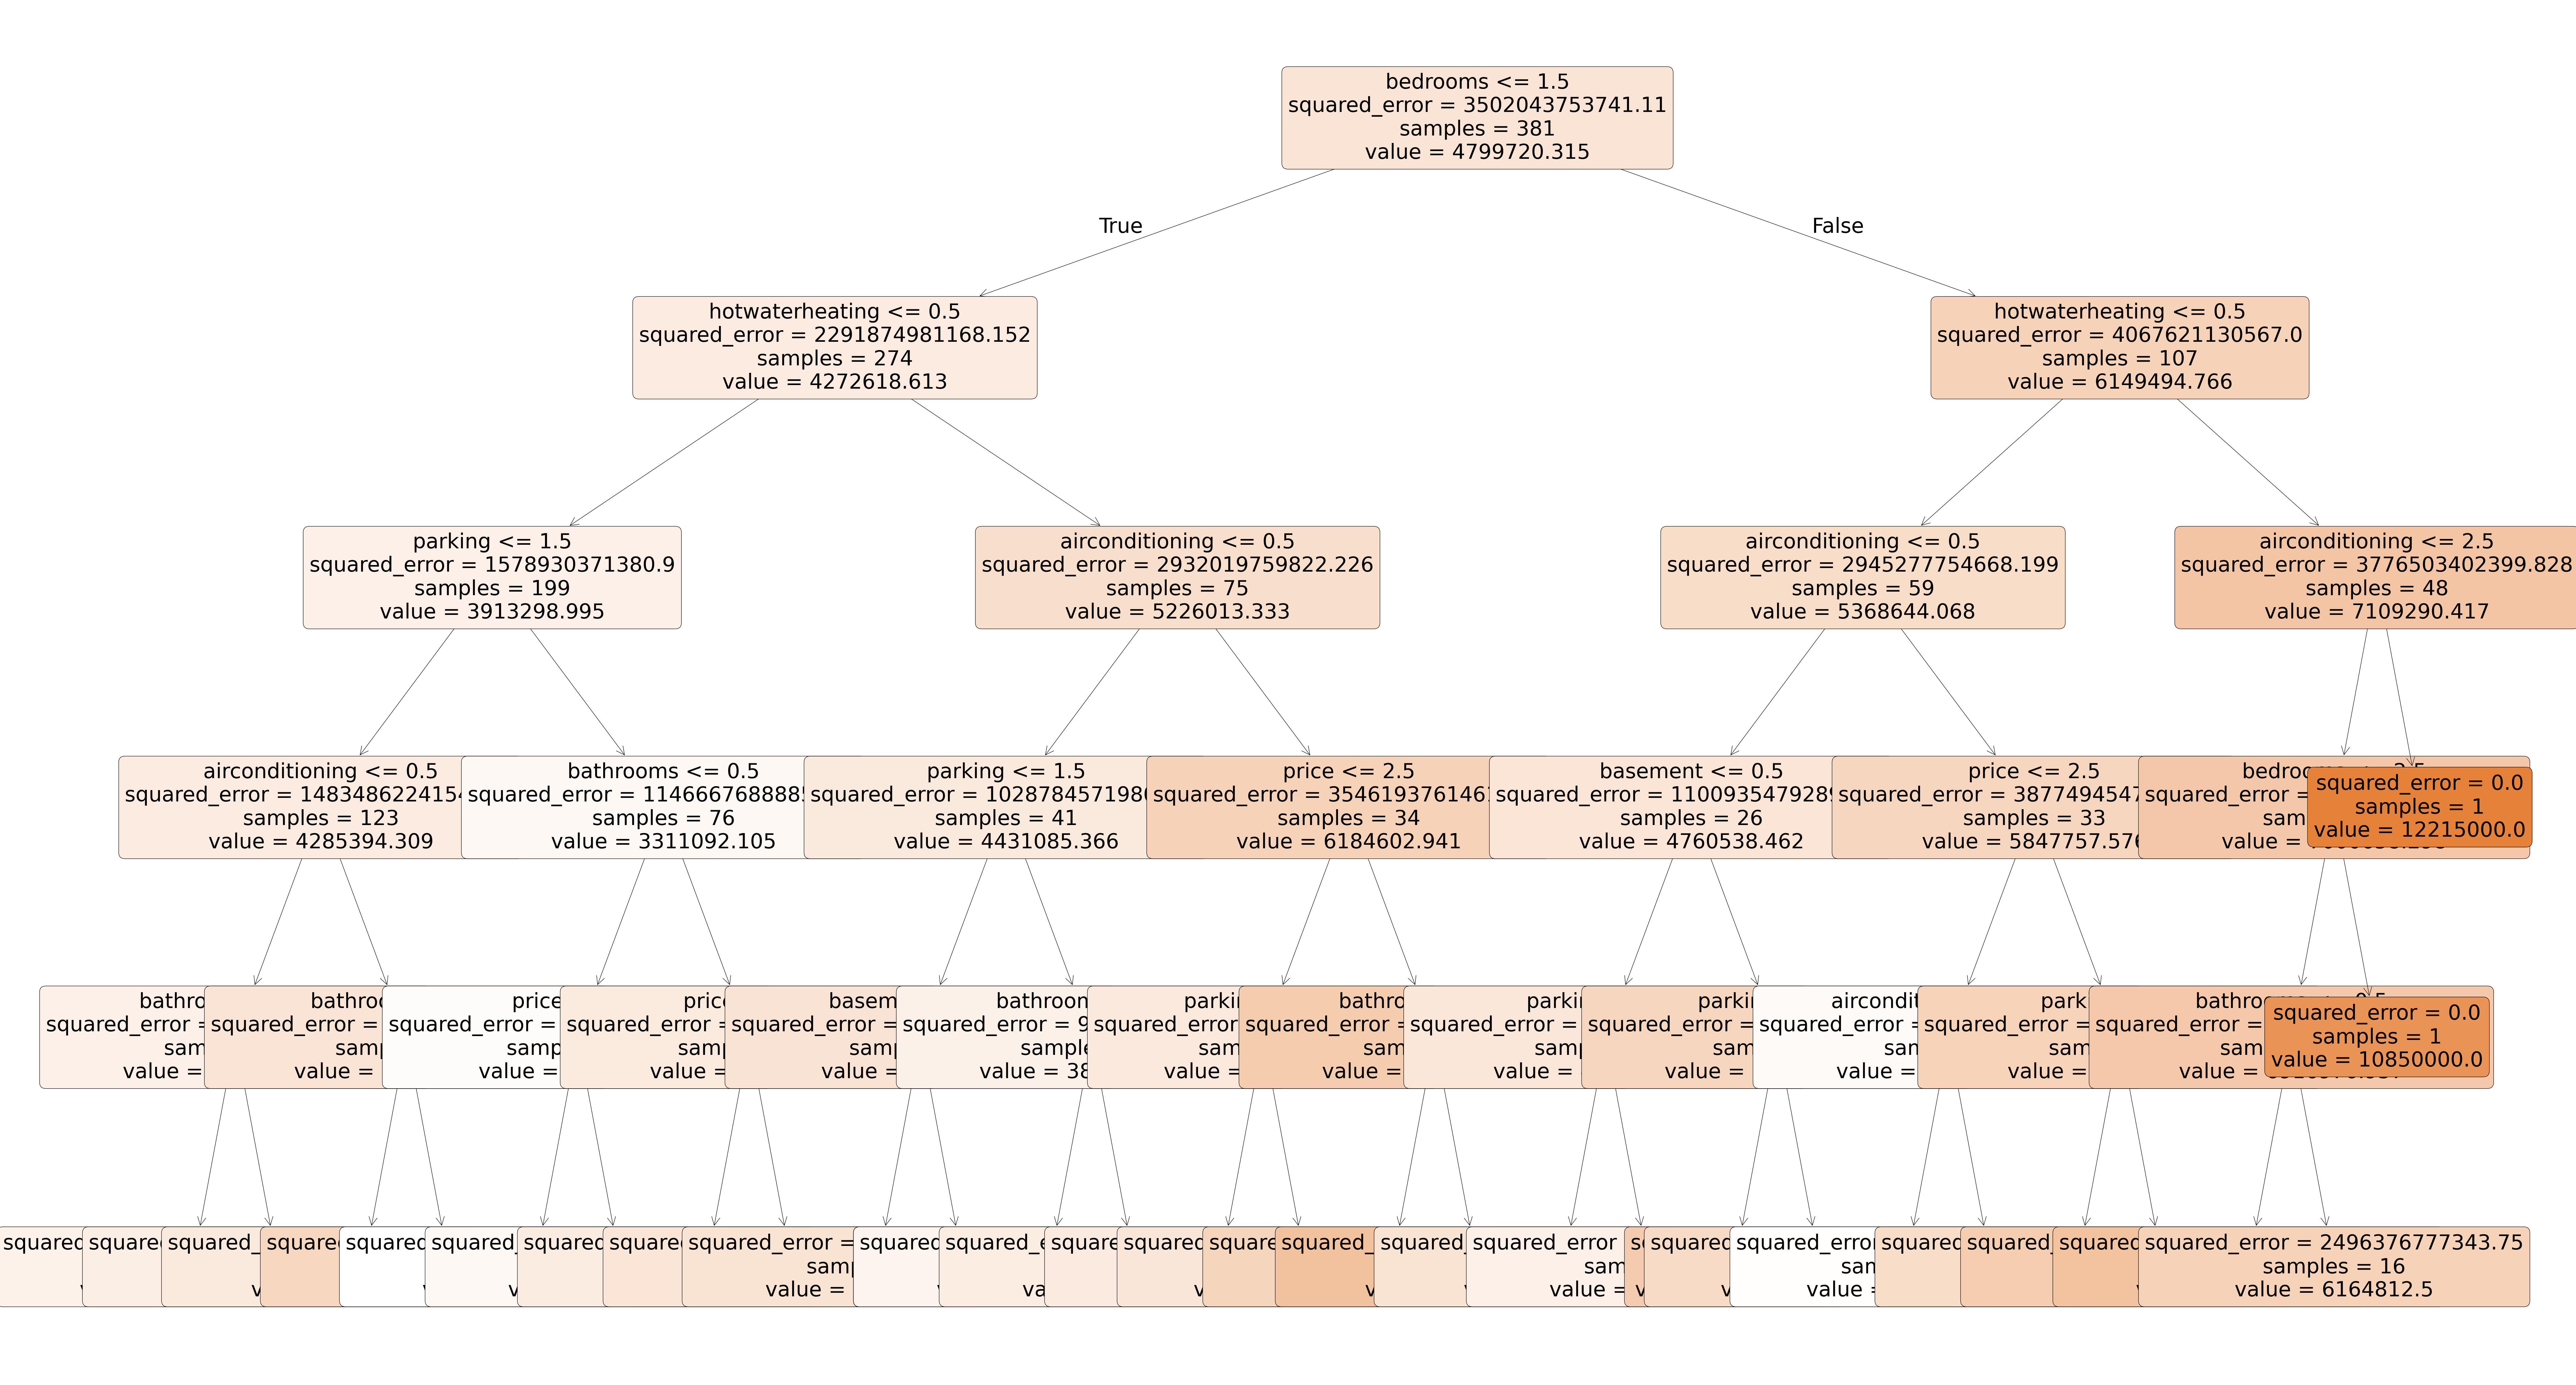

In [318]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(100, 60))  
plot_tree(model, 
          feature_names=df_new.columns,  
          filled=True,               
          rounded= True,              
          fontsize=50)              

plt.show()
